---

# PROJECT: LAPTOP PRICE PREDICTOR

---

## Description:
    The Laptop Price Predictor is a machine learning project designed to predict the price of laptops based on various features and specifications. Leveraging a diverse dataset containing information about laptop brands, processors, RAM, storage, graphics cards, and other technical details, the model employs advanced regression techniques to make accurate price predictions.

## Importing necessary libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Importing Dataset

In [2]:
df = pd.read_csv('LaptopData.csv')
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,HDD,SSD,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,0,128,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,0,0,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,0,256,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,0,512,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,0,256,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,0,128,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,0,512,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,0,0,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1000,0,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


<div style="text-align:left; vertical-align: middle; line-height: 120px;">
    <h2 style="font-size:32px;"><u>Data Preprocessing | Data Cleaning | Feature Engineering:</u></h2>
</div>


# 1- Data Overview

In [3]:
df.shape

(1303, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   HDD               1303 non-null   int64  
 8   SSD               1303 non-null   int64  
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price             1303 non-null   float64
dtypes: float64(2), int64(3), object(8)
memory usage: 132.5+ KB


❗ Type of some columns are needed to be changed. We'll do this when working with indivisual columns.

# 2- Checking for null values

In [5]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
HDD                 0
SSD                 0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

✔️ There are no null values in this data.

# 3- Checking for duplicates

In [6]:
df.duplicated().sum()

0

✔️ There are no duplicates in this data.

# 4- Working on Columns

   - **Strategy:** We will deal with each column indivisually one by one & in order from left to right.

   ## i. "Unnamed: 0" Column:

❗ Remove this extra index column.

In [7]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,HDD,SSD,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,0,128,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,0,0,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,0,256,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,0,512,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,0,256,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,0,128,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,0,512,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,0,0,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1000,0,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


   ## ii. "Company" Column:

In [8]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,HDD,SSD,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,0,128,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,0,0,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,0,256,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,0,512,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,0,256,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


❗Everything looks fine in the table but we'll recheck the column by plotting it.

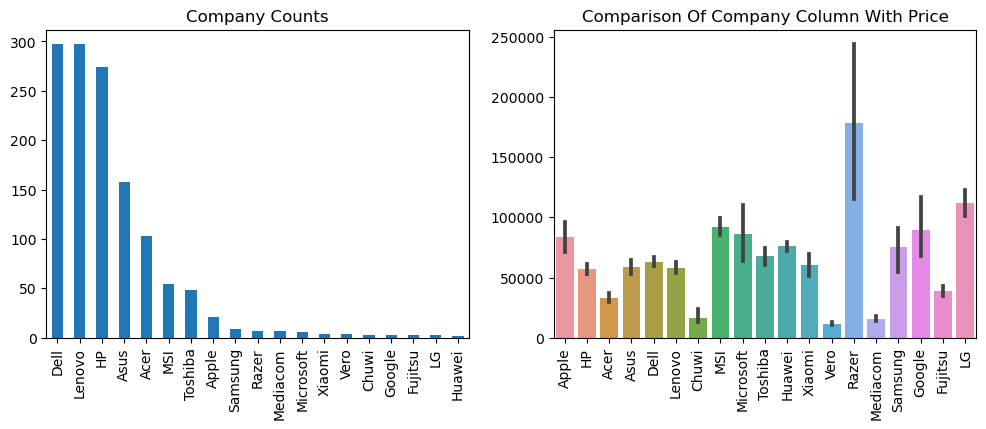

In [9]:
# Creating Canvas for plots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

# Creating First Plot
df['Company'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_title('Company Counts')

# Creating Second Plot
sns.barplot(x=df['Company'],y=df['Price'], ax=ax2)
ax2.set_title('Comparison Of Company Column With Price')
ax2.set_xlabel('')
ax2.set_ylabel('')

# Customize Plot
plt.xticks(rotation='vertical')
plt.show()

✔️ Everything is okay in this column.<br>
✔️ No outlier can be seen in this column.

## iii. "TypeName" Column:

In [10]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,HDD,SSD,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,0,128,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,0,0,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,0,256,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,0,512,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,0,256,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


❗Everything looks fine in the table but we'll recheck the column by plotting it.

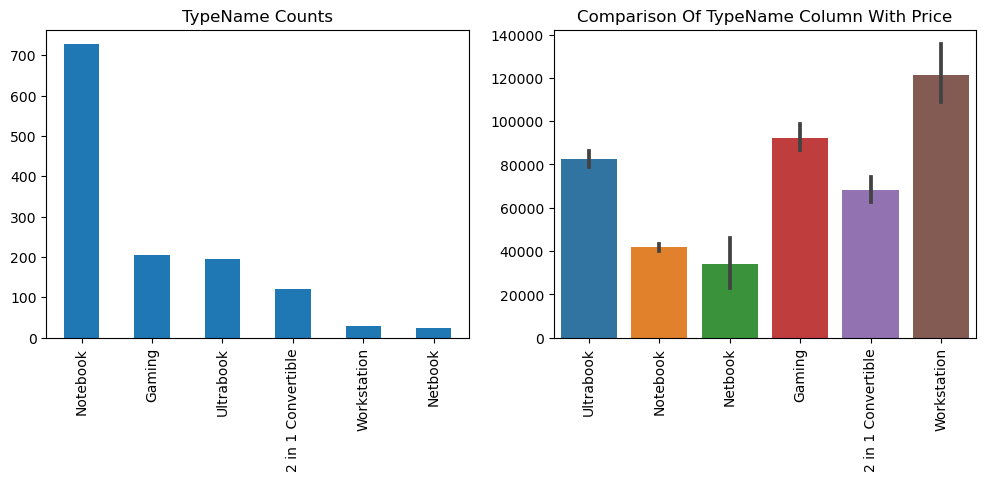

In [11]:
# Creating Canvas for plots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

# Creating First Plot
df['TypeName'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_title('TypeName Counts')

# Creating Second Plot
sns.barplot(x=df['TypeName'],y=df['Price'], ax=ax2)
ax2.set_title('Comparison Of TypeName Column With Price')
ax2.set_xlabel('')
ax2.set_ylabel('')

# Customize Plot
plt.xticks(rotation='vertical')
plt.show()

✔️ Everything is okay in this column.<br>
✔️ No outlier can be seen in this column.

## iv. "Inches" Column:

In [12]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,HDD,SSD,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,0,128,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,0,0,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,0,256,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,0,512,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,0,256,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


❗Everything looks fine in the table but we'll recheck the column by plotting it.

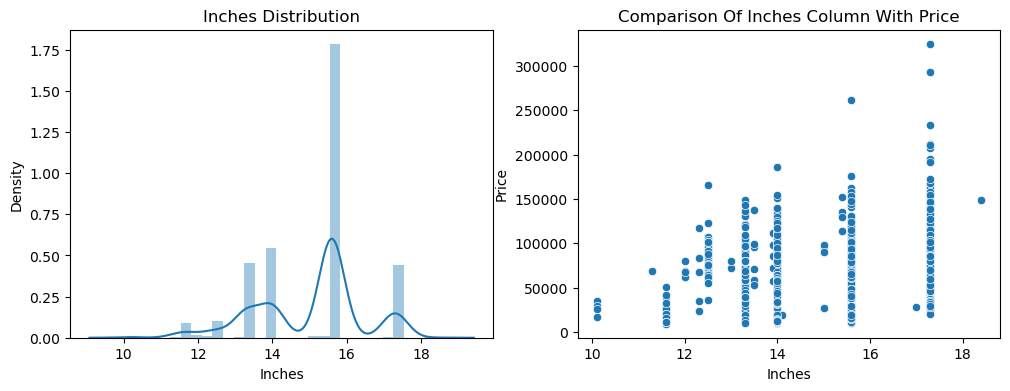

In [13]:
# Creating Canvas for plots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

# Creating First Plot
sns.distplot(df['Inches'], ax=ax1)
ax1.set_title('Inches Distribution')

# Creating Second Plot
sns.scatterplot(x=df['Inches'],y=df['Price'])
ax2.set_title('Comparison Of Inches Column With Price')

# Customize Plot
plt.show()

✔️ Everything looks fine here.<br>
✔️ The inches column is distributed normally (Gaussian Distribution).

## v. "ScreenResolution" Column:

❗ We have so much information in our ScreenResolution column. We'll take out important factors from this column.<br>
- Following columns will be taken out:
    1. TouchScreen
    2. IPSPanel
    3. ppi (This will combine screen sizes columns and inches column)

In [14]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

**For TouchScreen & IPS**

In [15]:
# Seperating the TouchScreen Column
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

# Seperating the Ips Column
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,HDD,SSD,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,0,128,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,0,0,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,0,256,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,0,512,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,0,256,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1


**For Ppi**

❗For ppi, we will first seperate the X and Y resolutions & then uses ppi formula to calculate it.

In [16]:
# Splitting the ScreenResolution Column
new = df['ScreenResolution'].str.split('x',n=1,expand=True)
df['X_res'] = new[0]
df['Y_res'] = new[1]

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,HDD,SSD,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,0,128,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,0,0,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,0,256,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,0,512,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,0,256,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,IPS Panel Retina Display 2560,1600


❗Now we have two columns but the X resolution column contains other text too. For this we will use a regular expression as follows:

- **df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])**


.str.replace(',',''): This operation removes all commas (',') from the selected column 'X_res'. This is useful if the column contains numerical values with commas as thousand separators.

.str.findall(r'(\d+\.?\d+)'): This operation applies a regular expression pattern r'(\d+\.?\d+)' to the modified column. The regular expression \d+\.?\d+ matches one or more digits, an optional decimal point, and one or more digits after the decimal point. It extracts all the numeric values from the modified column.

.apply(lambda x:x[0]): This applies a lambda function to each element of the resulting list after the regular expression operation. The lambda function takes a list of matched values and returns the first element of the list, effectively extracting the first numeric value found in the modified column.

In [17]:
# Removing extra info from X_res column 
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,HDD,SSD,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,0,128,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,0,0,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,0,256,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,0,512,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,0,256,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,2560,1600


❗Convert the data types & then Finally calculate ppi with the following formula:<br>
    $$ ppi = \frac{\sqrt{(Xres^2 + Yres^2)}}{Inches} $$ 

In [18]:
# Converting to int type for calculation
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

# Now calculating ppi(pixel density)
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,HDD,SSD,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,0,128,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,0,0,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,0,256,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,0,512,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,0,256,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,2560,1600,226.983005


✔️ Removing extra columns: Inches, ScreenResolution, X_res, Y_res because they are of no use after Ppi column.

In [19]:
df.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)
df.head()

,Company,TypeName,Cpu,Ram,HDD,SSD,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8GB,0,128,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8GB,0,0,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8GB,0,256,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16GB,0,512,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8GB,0,256,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,226.983005


## vi. "Cpu" Column:

❗ We'll obtain only the CPU brands from this column.<br>
❗ And will Categorized different processors.

In [20]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [21]:
# Taking out only first three necessary objects
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
df.head()

,Company,TypeName,Cpu,Ram,HDD,SSD,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8GB,0,128,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8GB,0,0,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8GB,0,256,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16GB,0,512,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8GB,0,256,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,226.983005,Intel Core i5


❗ Now, categorize on the basis of processors.

In [22]:
# Categorized different processors
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'
        

# Applying the function
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [23]:
df.head()

,Company,TypeName,Cpu,Ram,HDD,SSD,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8GB,0,128,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8GB,0,0,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8GB,0,256,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16GB,0,512,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8GB,0,256,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


In [24]:
# Removing extra columns
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

❗ Double checking the column by plotting it.

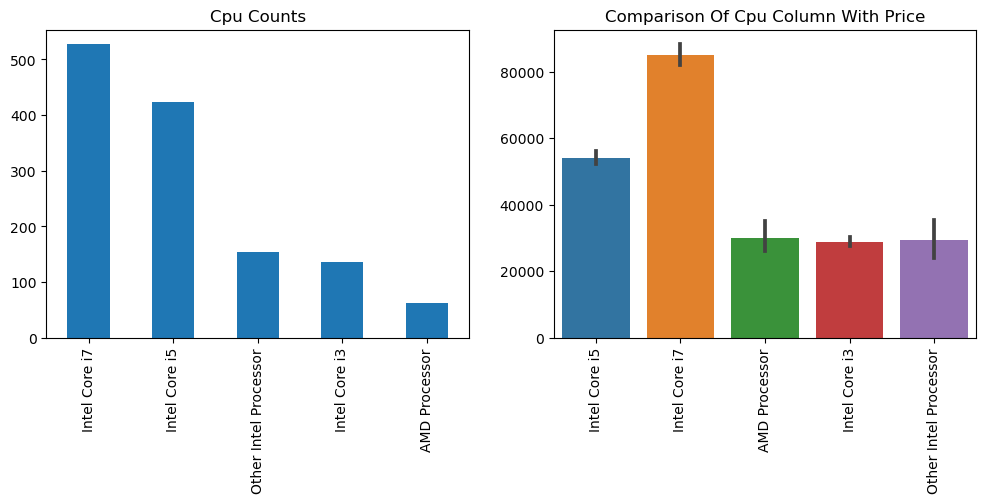

In [25]:
# Creating Canvas for plots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

# Creating First Plot
df['Cpu brand'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_title('Cpu Counts')

# Creating Second Plot
sns.barplot(x=df['Cpu brand'],y=df['Price'], ax=ax2)
ax2.set_title('Comparison Of Cpu Column With Price')
ax2.set_xlabel('')
ax2.set_ylabel('')

# Customize Plot
plt.xticks(rotation='vertical')
plt.show()

✔️ Everything looks fine now.

## vii. "Ram" Column:

In [26]:
df.head()

,Company,TypeName,Ram,HDD,SSD,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8GB,0,128,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8GB,0,0,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8GB,0,256,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16GB,0,512,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8GB,0,256,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,226.983005,Intel Core i5


❗ RAM column have suffix as a string which will cause error.

In [27]:
# Removing 'GB' suffix
df['Ram'] = df['Ram'].str.replace('GB','')

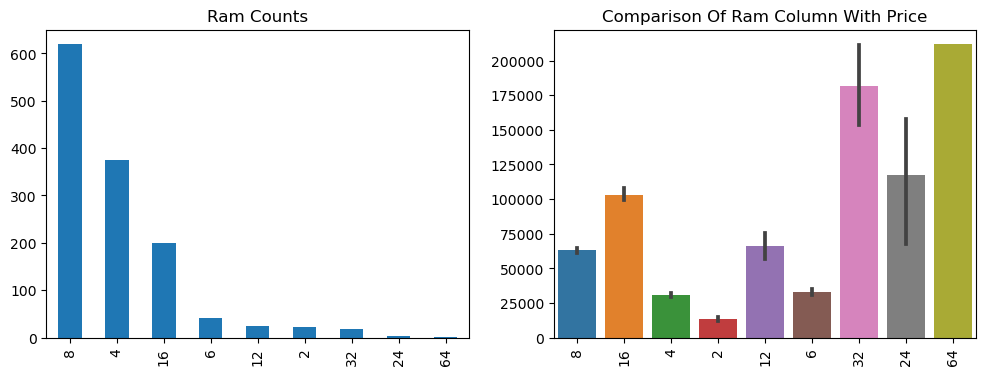

In [28]:
# Creating Canvas for plots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

# Creating First Plot
df['Ram'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_title('Ram Counts')

# Creating Second Plot
sns.barplot(x=df['Ram'],y=df['Price'], ax=ax2)
ax2.set_title('Comparison Of Ram Column With Price')
ax2.set_xlabel('')
ax2.set_ylabel('')

# Customize Plot
plt.xticks(rotation='vertical')
plt.show()

✔️ Everything looks fine now.

## viii. "Gpu" Column:

In [29]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

❗Obtain only the GPU brand from this column by splitting the column.

In [30]:
# Obtaining only the Brand which is on first position.
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [31]:
df.head()

,Company,TypeName,Ram,HDD,SSD,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,Gpu brand
0,Apple,Ultrabook,8,0,128,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,226.983005,Intel Core i5,Intel
1,Apple,Ultrabook,8,0,0,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940,Intel Core i5,Intel
2,HP,Notebook,8,0,256,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998,Intel Core i5,Intel
3,Apple,Ultrabook,16,0,512,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,220.534624,Intel Core i7,AMD
4,Apple,Ultrabook,8,0,256,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,226.983005,Intel Core i5,Intel


❗Checking our newly created column

In [32]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

❗ Remove the 'ARM' brand processor because it has only 1 data row which means that it is not a choice for Gpu brand normally.

In [33]:
df = df[df['Gpu brand'] != 'ARM']

In [34]:
# Drop the old Gpu column
df.drop(columns=['Gpu'],inplace=True)

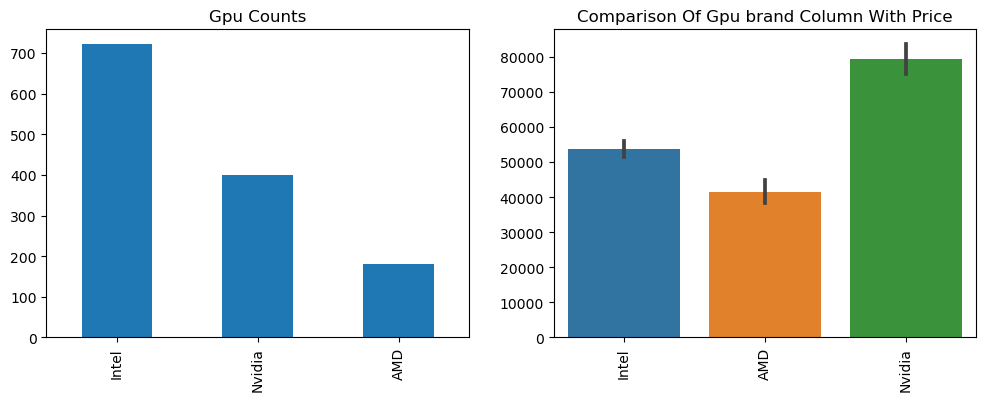

In [35]:
# Creating Canvas for plots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

# Creating First Plot
df['Gpu brand'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_title('Gpu Counts')

# Creating Second Plot
sns.barplot(x=df['Gpu brand'],y=df['Price'], ax=ax2)
ax2.set_title('Comparison Of Gpu brand Column With Price')
ax2.set_xlabel('')
ax2.set_ylabel('')

# Customize Plot
plt.xticks(rotation='vertical')
plt.show()

✔️ Everything looks fine now.

## ix. "OpSys" Column:

- Categorized the operating system column which is more convinient.
- The three categories will be:
    1. Windows
    2. Mac
    3. Other

In [36]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [37]:
# Categorizing the OpSys Column
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'
    

# Applying the function
df['os'] = df['OpSys'].apply(cat_os)

In [38]:
df.head()

,Company,TypeName,Ram,HDD,SSD,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,Gpu brand,os
0,Apple,Ultrabook,8,0,128,macOS,1.37kg,71378.6832,0,1,226.983005,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,8,0,0,macOS,1.34kg,47895.5232,0,0,127.677940,Intel Core i5,Intel,Mac
2,HP,Notebook,8,0,256,No OS,1.86kg,30636.0000,0,0,141.211998,Intel Core i5,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,0,512,macOS,1.83kg,135195.3360,0,1,220.534624,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,8,0,256,macOS,1.37kg,96095.8080,0,1,226.983005,Intel Core i5,Intel,Mac


In [39]:
# Removing the previous column
df.drop(columns=['OpSys'],inplace=True)

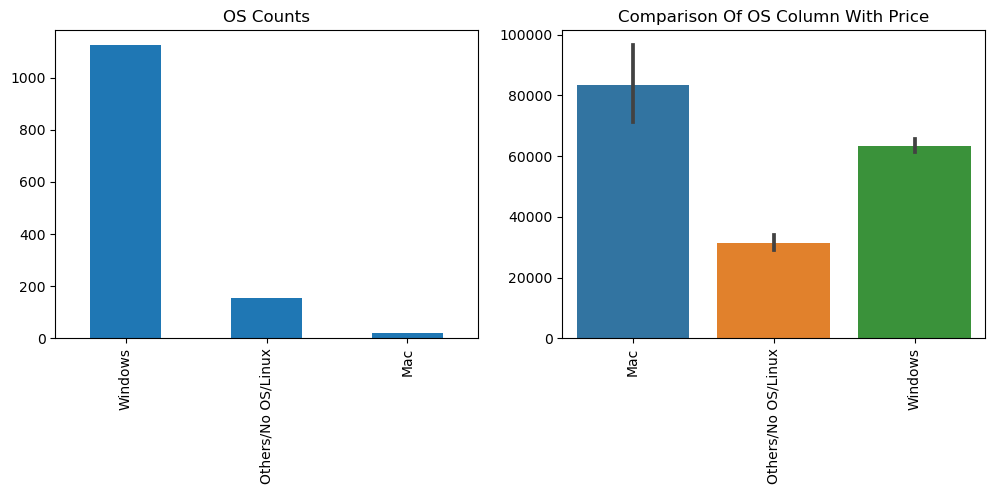

In [40]:
# Creating Canvas for plots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

# Creating First Plot
df['os'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_title('OS Counts')

# Creating Second Plot
sns.barplot(x=df['os'],y=df['Price'], ax=ax2)
ax2.set_title('Comparison Of OS Column With Price')
ax2.set_xlabel('')
ax2.set_ylabel('')

# Customize Plot
plt.xticks(rotation='vertical')
plt.show()

✔️ Everything looks fine now.

## x. "Weight" Column:

- Only remove the 'KG' from the values

In [41]:
df['Weight'] = df['Weight'].str.replace('kg','')

In [42]:
df.head()

,Company,TypeName,Ram,HDD,SSD,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,Gpu brand,os
0,Apple,Ultrabook,8,0,128,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,8,0,0,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel,Mac
2,HP,Notebook,8,0,256,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,0,512,1.83,135195.3360,0,1,220.534624,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,8,0,256,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel,Mac


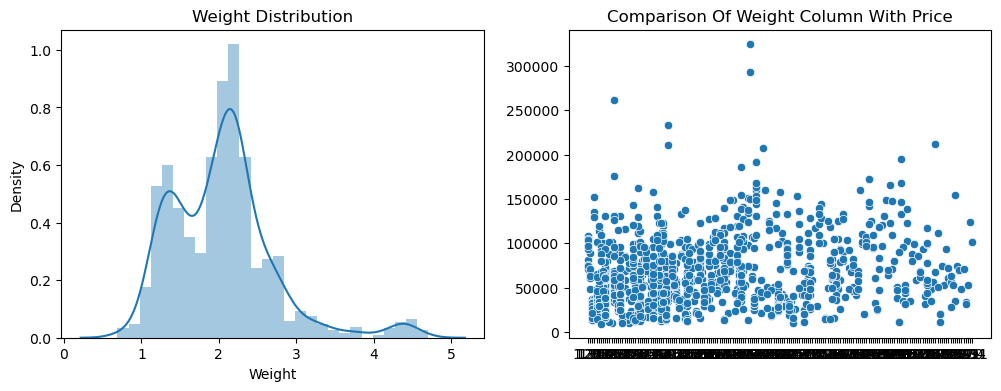

In [43]:
# Creating Canvas for plots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

# Creating First Plot
sns.distplot(df['Weight'], ax=ax1)
ax1.set_title('Weight Distribution')

# Creating Second Plot
sns.scatterplot(x=df['Weight'],y=df['Price'], ax=ax2)
ax2.set_title('Comparison Of Weight Column With Price')
ax2.set_xlabel('')
ax2.set_ylabel('')

# Customize Plot
plt.show()

✔️ Everything looks OK.<br>
✔️ Weight is already distributed normally (Gaussian Distribution)

## xi. "Price" Column:

- Check the distribution of Price column and make sure it is Normal Distribution.
- Use log for normal distribution.

In [44]:
df.head()

,Company,TypeName,Ram,HDD,SSD,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,Gpu brand,os
0,Apple,Ultrabook,8,0,128,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,8,0,0,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel,Mac
2,HP,Notebook,8,0,256,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,0,512,1.83,135195.3360,0,1,220.534624,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,8,0,256,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel,Mac


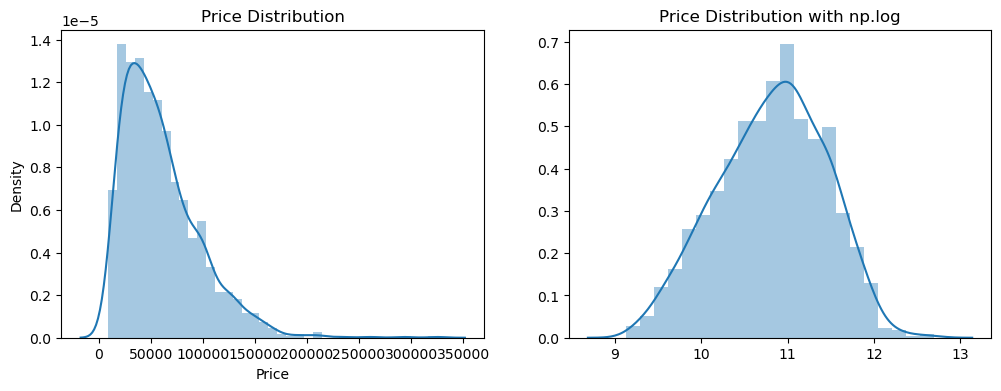

In [45]:
# Creating Canvas for plots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

# Creating First Plot
sns.distplot(df['Price'], ax=ax1)
ax1.set_title('Price Distribution')

# Creating Second Plot
sns.distplot(np.log(df['Price']), ax=ax2)
ax2.set_title('Price Distribution with np.log')
ax2.set_xlabel('')
ax2.set_ylabel('')

# Customize Plot
plt.show()

✔️ We will use the price column with 'Log' function to avoid skewness in the data.

# 5- Remove Unnecessary Columns

- Check the correlation between features and target(Price) column.
- Remove columns who has low correlation because low correlation means that column does not have significant effect on target column.

In [46]:
df.corr()['Price']

HDD           -0.096891
SSD            0.670660
Price          1.000000
Touchscreen    0.192917
Ips            0.253320
ppi            0.475368
Name: Price, dtype: float64

<Axes: >

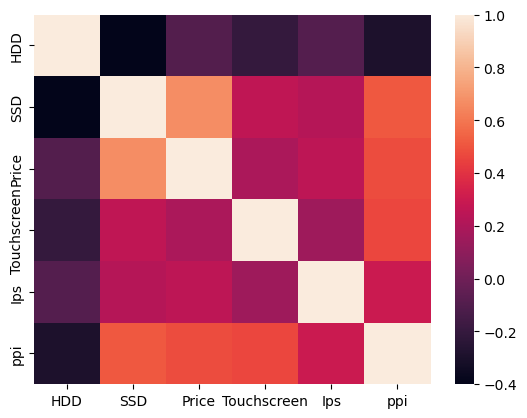

In [47]:
sns.heatmap(df.corr())

✔️ All columns are correlated with the target column which means that no column needed to be removed.

<div style="text-align:left; vertical-align: middle; line-height: 120px;">
    <h2 style="font-size:32px;"><u>Machine Learning Model Building:</u></h2>
</div>


# 1- Model Selection

- We have the final cleaned dataset as follows:

In [48]:
df.head()

,Company,TypeName,Ram,HDD,SSD,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,Gpu brand,os
0,Apple,Ultrabook,8,0,128,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,8,0,0,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel,Mac
2,HP,Notebook,8,0,256,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,0,512,1.83,135195.3360,0,1,220.534624,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,8,0,256,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel,Mac


## i. Splitting Dataset:

In [49]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [50]:
X

,Company,TypeName,Ram,HDD,SSD,Weight,Touchscreen,Ips,ppi,Cpu brand,Gpu brand,os
0,Apple,Ultrabook,8,0,128,1.37,0,1,226.983005,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,8,0,0,1.34,0,0,127.677940,Intel Core i5,Intel,Mac
2,HP,Notebook,8,0,256,1.86,0,0,141.211998,Intel Core i5,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,0,512,1.83,0,1,220.534624,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,8,0,256,1.37,0,1,226.983005,Intel Core i5,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,0,128,1.8,1,1,157.350512,Intel Core i7,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,0,512,1.3,1,1,276.053530,Intel Core i7,Intel,Windows
1300,Lenovo,Notebook,2,0,0,1.5,0,0,111.935204,Other Intel Processor,Intel,Windows
1301,HP,Notebook,6,1000,0,2.19,0,0,100.454670,Intel Core i7,AMD,Windows


In [51]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [52]:
# Splitting into train and test sets for model training.

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

**Import Neccessary libraries of Machine Learning**

In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

⭕ **For model selection**, we will use SK-Learn model selection map. By following this map, We have two models:
- Linear Regression.
- Random Forest Regressor.

<br>
You can view the map here: [Sk-Learn Map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

⭕ **OneHotEncoding:** We have some column which are in the 'str' data type & and Machine learning model does not process the 'str' type data. So for this purpose, a method is used called "One Hot Encoding" through which we convert 'str' data into 'bool' columns with values '0' or '1'.


⭕ **ColumnTransformer:** Column transformer is used for performing preprocessing steps. We will use here for One Hot Encoding.

⭕ **Pipeline:** a pipeline is used to sequence a series of data processing steps. The purpose of using a pipeline is to streamline the workflow and make the code more organized, readable, and maintainable.

## ii. Linear Regression:

In [54]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),
                                         [0,1,9,10,11])], remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8002405963857665
MAE 0.20453995809072942


## iii. Random Forest Regression:

In [55]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,9,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8615724635996873
MAE 0.16489966986853216


✔️ **Random Forest Regressor** is performing well in this case. So, we will use it as our final Model.

# 2- Final Model Deployment:

In [59]:
# Importing libraries
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

# One hot encoding
ct = make_column_transformer((OneHotEncoder(sparse=False, drop='first'),
                              ['Company','TypeName','Cpu brand','Gpu brand','os']),
                              remainder='passthrough', n_jobs=1, sparse_threshold=0)

# Initialize the regressor
rf = RandomForestRegressor()

# Use pipeline for model deployment
pipe = make_pipeline(ct, rf)

# Training the model
pipe.fit(X_train, y_train)

# Making Predictions
y_pred = pipe.predict(X_test)

# Printing the accuracy & errors
print('Accuracy:', r2_score(y_test, y_pred)*100)
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

Accuracy: 86.40663873667933
R2 score: 0.8640663873667932
MAE: 0.16267617250811242
MSE: 0.048343017356889506


# 3- Saving The Model:

In [57]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

<div style="text-align:center; vertical-align: middle; line-height: 120px;">
    <h2 style="font-size:32px;"><u>Thank You!</u></h2>
</div>
